# Introduction to Machine Learning 2

See https://learning.anaconda.cloud/getting-started-with-ai-ml

Cover major supervised machine learning algorithmss which use labelled data to make predicitons:

- linear regression
- Logistic regression
- Naive Bayes
- Decision trees / random forests
- Neural networks

Using `scikit-learn` for implementation

## Logistic Regression

Logistic regression is a common machine learning algorithm used for classification and probability prediction. 

In this module, you'll learn how to: 

- Fit an S-curve to data
- Understand maximum likelihood estimation
- Use scikit-learn to fit a logistic regression
- Evaluate classification model performance

### Comparison with linear regression

Linear regressions are not a good fit for classification problems - an infinite  line is not a good representation of probabilities between 0 and 1.

By contrast, **Logistic regression** predicts true or false for one or more variables.

Training data must have outcomes of 0 or 1, an S-curve (logistic function) is fitted to the points and used to predict probability.

### Example

Predictions for patients showing symptoms given hours of exposure to a chemical.

Independent variable is hours of exposure, dependent variable is 0 or 1, indicating "no symptoms" or "symptoms".

S-curve is fitted to the data to show a probability of symptoms after a given number of hours of exposure. 

![](./logistic-regression-example-01.png)

### Indicators for/against suitability of Logistic Regression

Should not be used if no correlation in the data, see later for tools to check quality.

### Logistic function

For a single independent variable the data is fitted to the **logistic function**:

$
y = \frac{1.0}{1.0 + e^{-(\beta_0+\beta_1x)}}
$

The linear function $\beta_0+\beta_1x$ is known as the **log-odds function** #furtherlearning.

`scikit-learn` will produce this curve.

### Maximum Likelihood Estimation

Logistic regression does not use sum of least squares as the measure for training, rather it uses a technique known as Maximum Likelihood Estimation.

For fitting the data, the algorithm projects the data points to the curve to see predicted likelihoods and multiplies them together.

False values are multiplied as $1.0 - y$

`scikit-learn` maximises this value to estimate $\beta_0$ and $\beta_1$

![](maximum-liklihood-estimation.png)

### Example of Logistic Regression in `scikit-learn`

In [22]:
# import dependencies
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression

In [23]:
# read the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")
df

,x,y
0,1.0,0
1,1.5,0
2,2.1,0
3,2.4,0
4,2.5,1
5,3.1,0
6,4.2,0
7,4.4,1
8,4.6,1
9,4.9,0


In [24]:
# Extract the independent X variables and dependent Y variables as two separate columns.
X = df.values[:, :-1]
Y = df.values[:, -1]

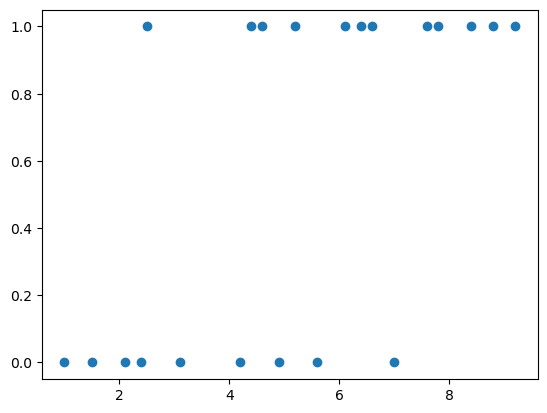

In [25]:
# plot the data
import matplotlib.pyplot as plt

# show in chart
plt.plot(X, Y, 'o') # scatterplot

In [26]:
# Create the LogisticRegression model and train it with the X and Y data. 
# To keep things simple, be sure to set penalty to None to maximize fitting.
model = LogisticRegression(penalty=None)
model.fit(X, Y) 

LogisticRegression(penalty=None)

In [27]:
# print the fitted coefficients
b1 = model.coef_.flatten()[0]
b0 = model.intercept_.flatten()[0]
print(b0, b1)

-3.175763946727168 0.6926721243460743


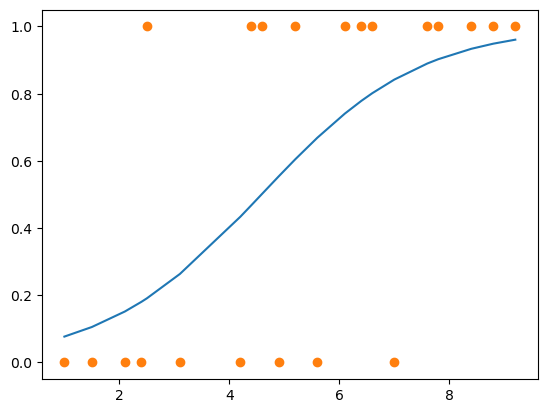

In [28]:
# plot the logistic regression curve
plt.plot(X, 1.0 / (1.0 + np.exp(-(b0 + b1*X)))) # curve
plt.plot(X, Y, 'o') # scatterplot
plt.show()

### Multiple Logistic Regression

Can extend to handle multiple independent variables by adding an additional  $\beta_x$ variable for each additional independent variable.

This can then solved in a similar way:

$$
f(x) = \frac{1.0}{1.0+e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... +  \beta_nx_n)}}
$$

### Assessing Logistic Regression fit

A couple of techniques are commonly used to assess fit quality (#furtherstudy):

- **Deviance** - measures quality of fit from 0 (perfect) to $\infty$ (bad fit), can also be used to compare different models on same dataset.
- **Pearson $\Chi^2$ Test** - measures how well the $x$ value predicts the $y$ variable by comparing it with the $x$ value not being used at all.

### Example of multiple logistic regression

In [29]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression

In [30]:
# read in 5 columns of data
df = pd.read_csv('https://bit.ly/3SMHvPa', delimiter=",")
df

,RAIN,LIGHTNING,CLOUDY,TEMPERATURE,GOOD_WEATHER_IND
0,0,1,1,74,0
1,0,0,0,69,1
2,1,0,1,58,0
3,0,0,0,71,1
4,0,0,0,73,1
5,0,1,1,80,0
6,0,1,1,74,0
7,0,0,0,73,1
8,1,0,1,79,0
9,0,0,1,72,1


In [31]:
# Extract the independent X variables and dependent Y variable as two separate datasets.
X = df.values[:, :-1]
Y = df.values[:, -1]

In [32]:
# Create the LogisticRegression model and train it with the X and Y data. To keep things simple, be sure to set penalty to None to maximize fitting.
model = LogisticRegression(penalty=None)
model.fit(X, Y) 

LogisticRegression(penalty=None)

In [33]:
# Print the coefficient values of the fitted model.
# RAIN, LIGHTNING, CLOUDY, TEMPERATURE
bx = model.coef_
b0 = model.intercept_
print(b0, bx)

[769.25079507] [[-1849.68766908 -1765.18763752   -62.67029102    -9.35164997]]


In [34]:
# Make a prediction on whether an observation is good weather
# rain, lightning, cloudy, temperature
prediction = model.predict_proba([[0, 0, 1, 76]])
print("GOOD WEATHER PREDICTION: ", prediction)

GOOD WEATHER PREDICTION:  [[0.98440203 0.01559797]]


## Accuracy and Confusion Matrices

Accuracy on it's own is not enough. (e.g. if 99% don't quit, just predict 'no quits')

Confusion Matrices break out the false positives and false negatives from the model.

![](confusion-matrix.png)


When arranged like this the measure of quality is the highest total on the topleft-bottomright diaghonal (i.e. maximise true positive + true negative).

From these values further measures can be derived:

![](confusion-matrix-2.png)

## ROC and AUC

Come back and do some notes on these

### Example 1 of ROC and AUC

In [35]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/3SMHvPa', delimiter=",")
df

,RAIN,LIGHTNING,CLOUDY,TEMPERATURE,GOOD_WEATHER_IND
0,0,1,1,74,0
1,0,0,0,69,1
2,1,0,1,58,0
3,0,0,0,71,1
4,0,0,0,73,1
5,0,1,1,80,0
6,0,1,1,74,0
7,0,0,0,73,1
8,1,0,1,79,0
9,0,0,1,72,1


In [36]:
X = df.values[:, :-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=10)

model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

c:\Users\JulianElve\anaconda3\envs\learn\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [37]:
'''
[[truepositives falsenegatives]
 [falsepositives truenegatives]]
 '''
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction, normalize=None)
print(matrix)


[[13  0]
 [ 0  4]]


In [38]:
from sklearn.metrics import roc_auc_score 
results = roc_auc_score(prediction, Y_test)
print("AUC: %.3f" % results)

AUC: 1.000


### Example 2 ROC/AUC

In [45]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 


df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")
df



,RED,GREEN,BLUE,LIGHT_OR_DARK_FONT_IND
0,0,0,0,0
1,0,0,128,0
2,0,0,139,0
3,0,0,205,0
4,0,0,238,0
...,...,...,...,...
1340,95,158,160,1
1341,96,123,139,0
1342,97,97,97,0
1343,99,184,255,1


In [46]:
# Extract input variables (all rows, all columns but last column)
# Scale the R,G,B values to be between 0 and 1, not 0 and 255.  
X = (df.values[:, :-1] / 255.0)

# Extract output column (all rows, last column)
Y = df.values[:, -1]



In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=10)

model = LogisticRegression(penalty=None)
model.fit(X_train, Y_train)

prediction = model.predict(X_test)

'''
[[truepositives falsenegatives]
 [falsepositives truenegatives]]
 '''
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction, normalize=None)
print(matrix)


results = roc_auc_score(prediction, Y_test)
print("AUC: %.3f" % results)

[[174   0]
 [  0 275]]
AUC: 1.000
